In [157]:
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import copy, math
from sklearn.metrics import accuracy_score

In [124]:
df = pd.read_csv('WaterQuality.csv')
safe = df[df['is_safe']==1]
notsafe = df[df['is_safe']==0]
notsafe = notsafe.sample(n=len(safe), random_state=101)
df = pd.concat([safe,notsafe],axis=0)
df=(df-df.min())/(df.max()-df.min())
df['is_safe'] = df['is_safe'].astype(int)
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.329341,0.304931,0.038835,0.588843,0.053846,0.040416,0.922222,0.085427,0.033333,0.20,...,0.270,0.814177,0.391003,0.7,0.631905,0.850690,0.8,0.68,0.222222,1
1,0.463074,0.710164,0.009709,0.683884,0.015385,0.609700,0.755556,0.331658,0.600000,0.65,...,0.500,0.101772,0.667820,0.3,0.540007,0.402760,0.8,0.54,0.555556,1
3,0.271457,0.380409,0.038835,0.611570,0.007692,0.834873,0.033333,0.834171,0.720000,0.71,...,0.080,0.071392,0.446367,0.4,0.152662,0.215809,0.2,0.90,0.555556,1
4,0.183633,0.816505,0.029126,0.041322,0.046154,0.308314,0.766667,0.286432,0.406667,0.13,...,0.585,0.341266,0.384083,0.3,0.282893,0.302384,0.2,0.12,0.222222,1
5,0.187625,0.485743,0.029126,0.595041,0.023077,0.092379,0.477778,0.693467,0.073333,0.67,...,0.675,0.493671,0.653979,0.6,0.454804,0.680050,0.8,0.38,0.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0.762475,0.575646,0.786408,0.770661,0.692308,0.282910,0.877778,0.864322,0.486667,0.81,...,0.775,0.533165,0.667820,0.1,0.787580,0.593476,0.7,0.98,1.000000,0
7386,0.005988,0.062731,0.009709,0.179752,0.384615,0.010393,0.066667,0.432161,0.073333,0.85,...,0.505,0.350380,0.377163,0.8,0.157516,0.062735,0.4,0.04,0.666667,0
7875,0.009980,0.003690,0.067961,0.214876,0.538462,0.087760,0.044444,0.015075,0.913333,0.00,...,0.805,0.148354,0.802768,0.9,0.044191,0.225847,0.4,0.10,0.111111,0
4500,0.009980,0.870178,0.058252,0.173554,0.461538,0.017321,0.033333,0.020101,0.193333,0.00,...,0.975,0.418734,0.204152,0.7,0.055239,0.393977,0.6,0.20,0.222222,0


In [125]:
X = df.drop(['is_safe'], axis=1).values
Y = df['is_safe'].values

In [126]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [127]:
def compute_cost_logistic(X, y, w):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w)
        f_w_i = sigmoid(z_i)
        cost += (f_w_i-y[i])**2
    cost = cost / m
    return cost

In [128]:
def compute_gradient_logistic(X, y, w): 
    m = X.shape[0]
    dj_dw = 0 
    for i in range(m):
        f_w_i = sigmoid(np.dot(X[i],w))    
        err_i  = f_w_i  - y[i]    
        dj_dw += 2*err_i*f_w_i*(1-f_w_i)*X[i]
    dj_dw = dj_dw/m
    return dj_dw

In [129]:
def gradient_descent(X, y, w_in, alpha, num_iters): 
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw = compute_gradient_logistic(X, y, w)   
        # Update Parameters using w, alpha and gradient
        w = w - alpha * dj_dw               
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w) )
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, J_history         #return final w and J history for graphing

In [130]:
w_tmp  = np.zeros_like(X[0])
alpha = 0.01
iters = 10000
w_out, J = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.2499641988734528   
Iteration 1000: Cost 0.2225797797038566   
Iteration 2000: Cost 0.20627830478928494   
Iteration 3000: Cost 0.1960899310394989   
Iteration 4000: Cost 0.18928038211572523   
Iteration 5000: Cost 0.18443710969715404   
Iteration 6000: Cost 0.1808131235204977   
Iteration 7000: Cost 0.17799168296790333   
Iteration 8000: Cost 0.1757264302319978   
Iteration 9000: Cost 0.1738636075951899   

Updated Parameters: w:[ 1.43497622e+00 -6.95787431e-02 -7.96842619e-01  1.91196490e-01
 -1.24875621e+00  7.36575641e-01  6.87385445e-01 -2.72955442e-02
  2.21822028e-01  2.06833958e-02 -4.96095580e-01 -1.48367712e-01
 -2.70511428e-01 -3.27702900e-04 -1.51862351e-01  6.45324559e-02
  8.94683758e-02 -1.31026948e-01  6.38482585e-02 -4.26975726e-01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


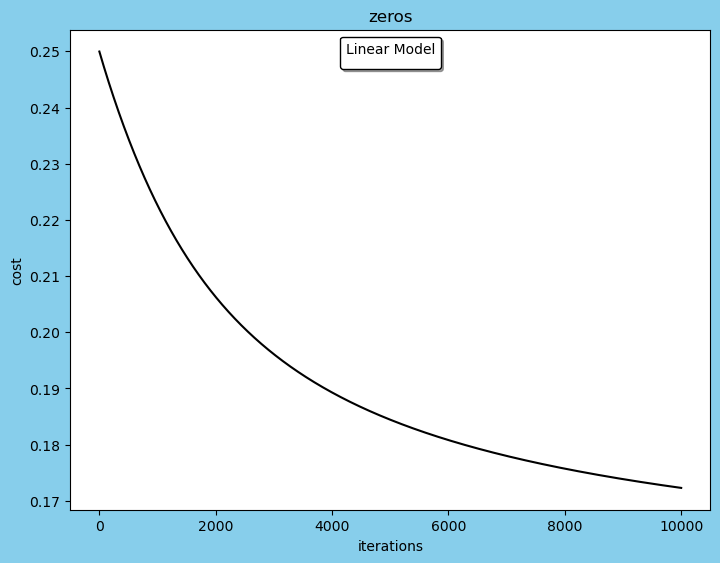

In [131]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='zeros',facecolor='w')
plt.plot(np.arange(10000),J,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [132]:
w_tmp  = np.random.rand(X[0].shape[0])
alpha = 0.01
iters = 10000
w_out, J2 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.465398745203109   
Iteration 1000: Cost 0.4256827518601472   
Iteration 2000: Cost 0.2633116829170622   
Iteration 3000: Cost 0.21792434688894466   
Iteration 4000: Cost 0.20842020152657054   
Iteration 5000: Cost 0.20115856616952496   
Iteration 6000: Cost 0.19540031693827342   
Iteration 7000: Cost 0.1907341242623062   
Iteration 8000: Cost 0.18688695366353797   
Iteration 9000: Cost 0.183670840705237   

Updated Parameters: w:[ 1.59412706 -0.08853546 -0.14062106  0.17664982 -1.07428284  0.75420581
  0.5464649   0.08809427  0.18500242 -0.35601732 -0.10475544 -0.06821833
 -0.1884241  -0.28053581 -0.460471    0.31072737  0.34540057 -0.25893331
  0.1713309  -0.53269575]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


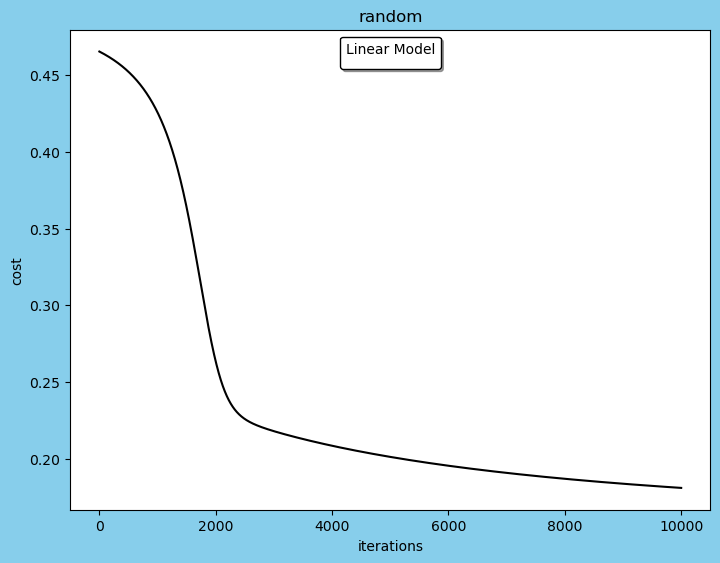

In [133]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='random',facecolor='w')
plt.plot(np.arange(10000),J2,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

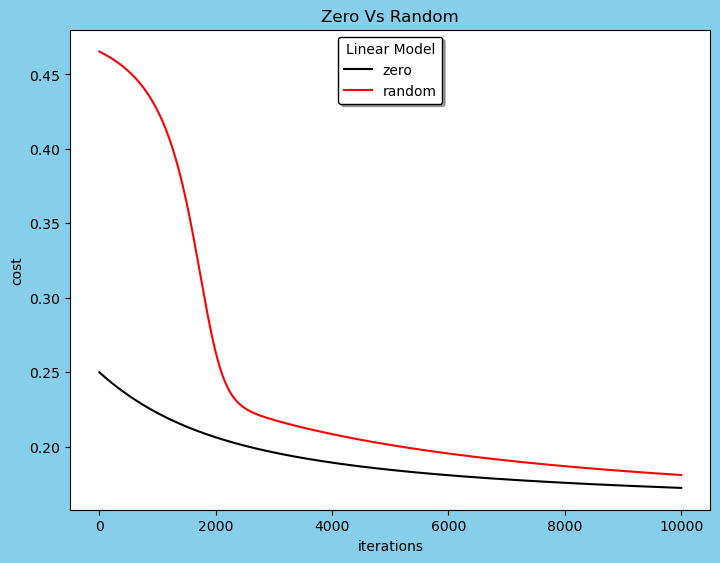

In [134]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='Zero Vs Random',facecolor='w')
plt.plot(np.arange(10000),J,color='black')
plt.plot(np.arange(10000),J2,color='r')
plt.legend(['zero','random'],facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [135]:
w_tmp  = np.zeros_like(X[0])

In [136]:
alpha = 0.1
iters = 10000
w_out, J1 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.24964254936031277   
Iteration 1000: Cost 0.17228242188562293   
Iteration 2000: Cost 0.1643681856991717   
Iteration 3000: Cost 0.16143812593238352   
Iteration 4000: Cost 0.1599701170469419   
Iteration 5000: Cost 0.15910370548194103   
Iteration 6000: Cost 0.1585343088820668   
Iteration 7000: Cost 0.1581304124607871   
Iteration 8000: Cost 0.15782726175567258   
Iteration 9000: Cost 0.1575898027670239   

Updated Parameters: w:[ 3.14135415e+00  9.36489197e-02 -2.57565683e+00  3.98972113e-01
 -1.85057987e+00  1.27516585e+00  9.20898640e-01 -4.61398487e-01
  7.63372649e-01  4.42760139e-01 -1.00489673e+00 -1.54625418e-01
 -3.40565926e-01 -5.59969607e-02  2.61694296e-03 -2.20343032e-01
 -4.42423990e-02 -1.77728435e-01 -6.52629425e-01 -7.11578537e-01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


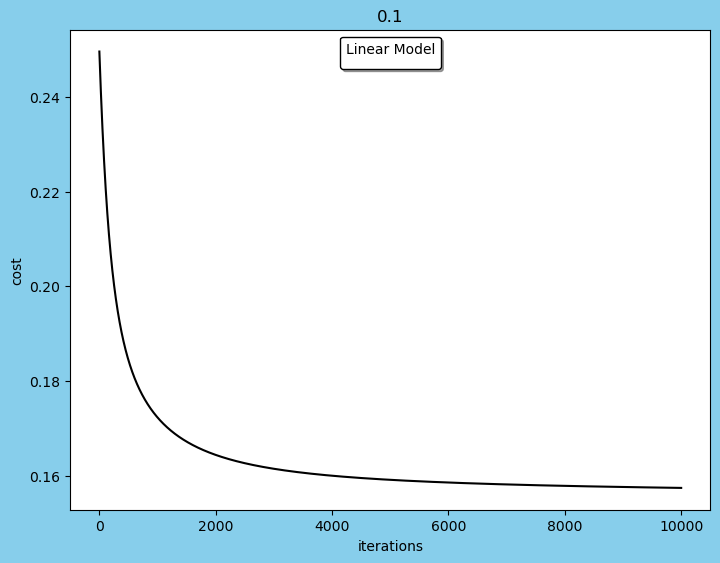

In [137]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.1',facecolor='w')
plt.plot(np.arange(10000),J1,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [138]:
alpha = 0.05
iters = 10000
w_out, J2 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.24982111889277794   
Iteration 1000: Cost 0.18441344637649243   
Iteration 2000: Cost 0.17229356804658819   
Iteration 3000: Cost 0.16718273438977393   
Iteration 4000: Cost 0.16437194801102392   
Iteration 5000: Cost 0.16262045802463607   
Iteration 6000: Cost 0.16143996019441711   
Iteration 7000: Cost 0.16059811976629523   
Iteration 8000: Cost 0.15997117521639453   
Iteration 9000: Cost 0.15948780607349466   

Updated Parameters: w:[ 2.66200612  0.04879272 -1.91951197  0.31665392 -1.87558834  1.13415709
  0.88477551 -0.33298113  0.65520428  0.2974593  -0.8406038  -0.14549074
 -0.30447187 -0.01821358 -0.03492153 -0.17671704 -0.02941737 -0.1520105
 -0.46052129 -0.67895952]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


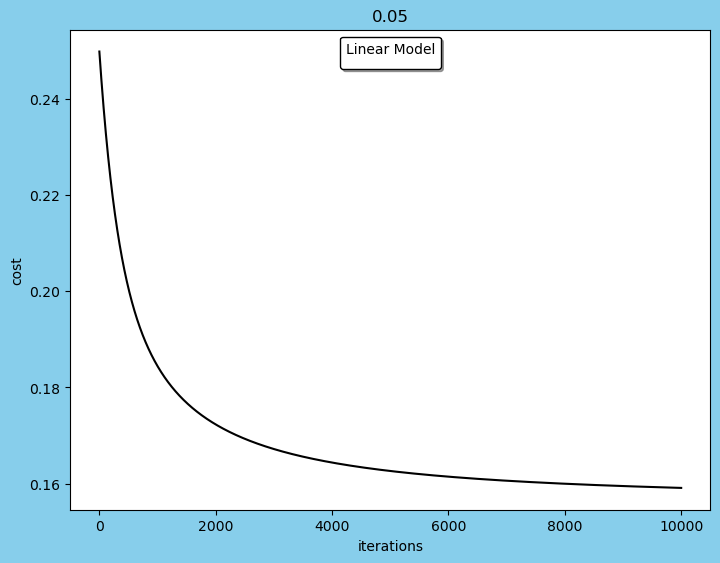

In [139]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.05',facecolor='w')
plt.plot(np.arange(10000),J2,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [140]:
alpha = 0.01
iters = 10000
w_out, J3 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.2499641988734528   
Iteration 1000: Cost 0.2225797797038566   
Iteration 2000: Cost 0.20627830478928494   
Iteration 3000: Cost 0.1960899310394989   
Iteration 4000: Cost 0.18928038211572523   
Iteration 5000: Cost 0.18443710969715404   
Iteration 6000: Cost 0.1808131235204977   
Iteration 7000: Cost 0.17799168296790333   
Iteration 8000: Cost 0.1757264302319978   
Iteration 9000: Cost 0.1738636075951899   

Updated Parameters: w:[ 1.43497622e+00 -6.95787431e-02 -7.96842619e-01  1.91196490e-01
 -1.24875621e+00  7.36575641e-01  6.87385445e-01 -2.72955442e-02
  2.21822028e-01  2.06833958e-02 -4.96095580e-01 -1.48367712e-01
 -2.70511428e-01 -3.27702900e-04 -1.51862351e-01  6.45324559e-02
  8.94683758e-02 -1.31026948e-01  6.38482585e-02 -4.26975726e-01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


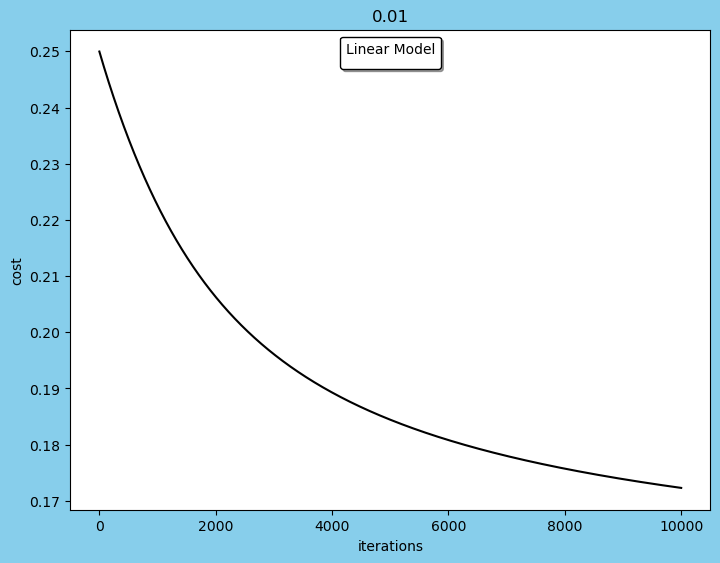

In [141]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.01',facecolor='w')
plt.plot(np.arange(10000),J3,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [142]:
alpha = 0.005
iters = 10000
w_out, J4 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.24998209788081255   
Iteration 1000: Cost 0.23447269634250575   
Iteration 2000: Cost 0.22259147602844032   
Iteration 3000: Cost 0.21342641066350254   
Iteration 4000: Cost 0.2062861149623684   
Iteration 5000: Cost 0.20063874081896982   
Iteration 6000: Cost 0.19609533826568332   
Iteration 7000: Cost 0.19237701955604822   
Iteration 8000: Cost 0.18928429920633089   
Iteration 9000: Cost 0.18667352644520593   

Updated Parameters: w:[ 0.97402607 -0.07875329 -0.47693838  0.15348592 -0.87219438  0.54463107
  0.52568686  0.02489128  0.08983633 -0.02544128 -0.36896851 -0.13170992
 -0.22086328  0.01189187 -0.14395004  0.11310001  0.1101508  -0.1170543
  0.14822201 -0.29664331]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


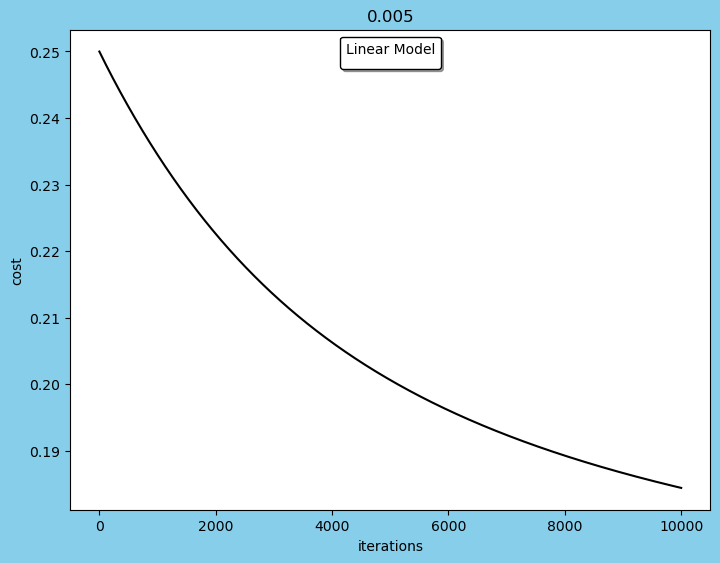

In [143]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.005',facecolor='w')
plt.plot(np.arange(10000),J4,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [144]:
alpha = 0.001
iters = 10000
w_out, J5 = gradient_descent(X, Y, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.24999641932723735   
Iteration 1000: Cost 0.2465310544722961   
Iteration 2000: Cost 0.2432687563365631   
Iteration 3000: Cost 0.24018307185658164   
Iteration 4000: Cost 0.23725842035874695   
Iteration 5000: Cost 0.23448418732973197   
Iteration 6000: Cost 0.231851971289003   
Iteration 7000: Cost 0.2293543536671999   
Iteration 8000: Cost 0.22698438064666834   
Iteration 9000: Cost 0.22473536636298244   

Updated Parameters: w:[ 0.2824633  -0.03120918 -0.11321589  0.05740001 -0.25475462  0.17660572
  0.17484008  0.0256581   0.00568945 -0.01885288 -0.11849628 -0.04698895
 -0.07284764  0.01340284 -0.05279649  0.06190653  0.05441666 -0.04237143
  0.08266378 -0.08450263]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


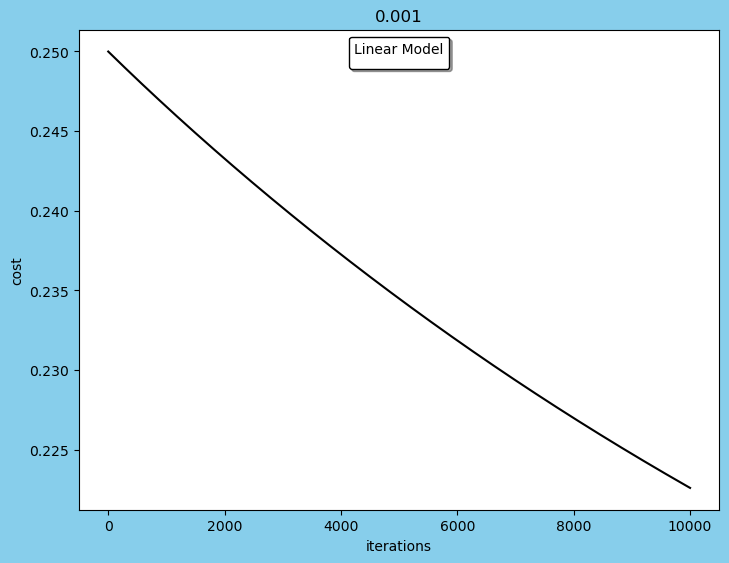

In [145]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.001',facecolor='w')
plt.plot(np.arange(10000),J5,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

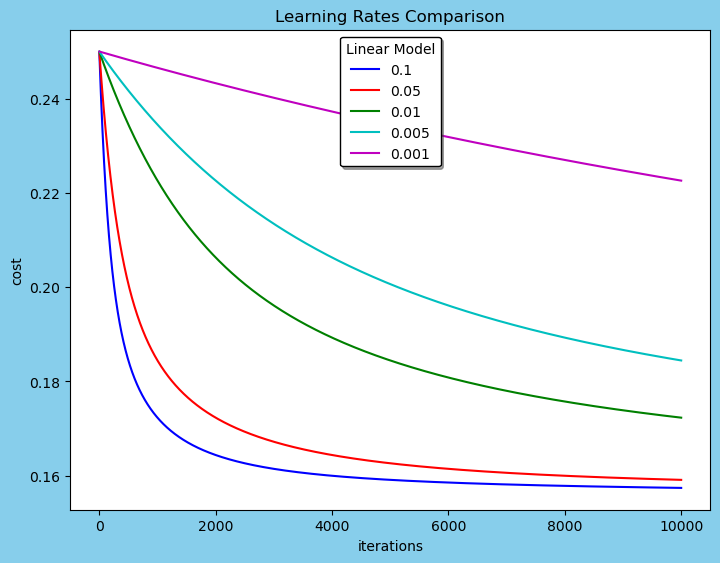

In [146]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='Learning Rates Comparison',facecolor='w')
plt.plot(np.arange(10000),J1,color='b')
plt.plot(np.arange(10000),J2,color='r')
plt.plot(np.arange(10000),J3,color='g')
plt.plot(np.arange(10000),J4,color='c')
plt.plot(np.arange(10000),J5,color='m')
plt.legend(['0.1','0.05','0.01','0.005','0.001'],facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [147]:
np.random.seed(200)
df_train, df_test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])

In [148]:
df_train['is_safe'].value_counts()

1    743
0    716
Name: is_safe, dtype: int64

In [149]:
df_test['is_safe'].value_counts()

0    196
1    169
Name: is_safe, dtype: int64

In [150]:
X_train = df_train.drop(['is_safe'], axis=1).values
Y_train = df_train['is_safe'].values
X_test = df_test.drop(['is_safe'], axis=1).values
Y_test = df_test['is_safe'].values

In [151]:
alpha = 0.1
iters = 10000
w_out, J = gradient_descent(X_train, Y_train, w_tmp, alpha, iters) 
print(f"\nUpdated Parameters: w:{w_out}")

Iteration    0: Cost 0.24963618462348108   
Iteration 1000: Cost 0.17319094606361873   
Iteration 2000: Cost 0.16485710775836487   
Iteration 3000: Cost 0.16171168414551454   
Iteration 4000: Cost 0.16009985751413566   
Iteration 5000: Cost 0.15912186227792657   
Iteration 6000: Cost 0.15845951704508696   
Iteration 7000: Cost 0.15797542349625712   
Iteration 8000: Cost 0.1576017391359156   
Iteration 9000: Cost 0.15730151648911925   

Updated Parameters: w:[ 3.29119149  0.03609237 -2.76626553  0.45487618 -1.72225319  1.18204416
  0.97219558 -0.56490136  0.7673387   0.45598976 -0.95257521 -0.28785047
 -0.23703051  0.07261045  0.07646067 -0.1596014  -0.03195971 -0.2047944
 -0.71282838 -0.7680473 ]


In [154]:
def predict(X):
    w = np.array([3.29119149,  0.03609237, -2.76626553, 0.45487618, -1.72225319, 1.18204416, 0.97219558, -0.56490136, 0.7673387, 0.45598976, -0.95257521, -0.28785047, -0.23703051, 0.07261045, 0.07646067, -0.1596014, -0.03195971, -0.2047944, -0.71282838, -0.7680473])
    preds = []
    for x in X:
        if (sigmoid(w.dot(x)) >= 0.5):
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [155]:
preds = predict(X_test)

In [158]:
acc = accuracy_score(Y_test, preds)

In [159]:
acc

0.7780821917808219